In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#load the dataset
sales_data = pd.read_csv("https://raw.githubusercontent.com/gamesconsort/cga-internship-projects/main/probabilistic-sales-forecasting/data/supermarket_sales_data")

In [3]:
#check the first five rows of the dataset
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#check the data distribution
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


In [5]:
#check for missing values
sales_data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
#replacing 2019 in the date field with 2022
import datetime

In [7]:
#transform Date column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date']) #convert the column to datetime to perform date operations                               
sales_data['Date'] = sales_data['Date'].map(lambda x: x.replace(year = 2022))

In [8]:
sales_data['Date'].head()

0   2022-01-05
1   2022-03-08
2   2022-03-03
3   2022-01-27
4   2022-02-08
Name: Date, dtype: datetime64[ns]

In [9]:
sales_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### Exploratory Data Analysis

In [10]:
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2022-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2022-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2022-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2022-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2022-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


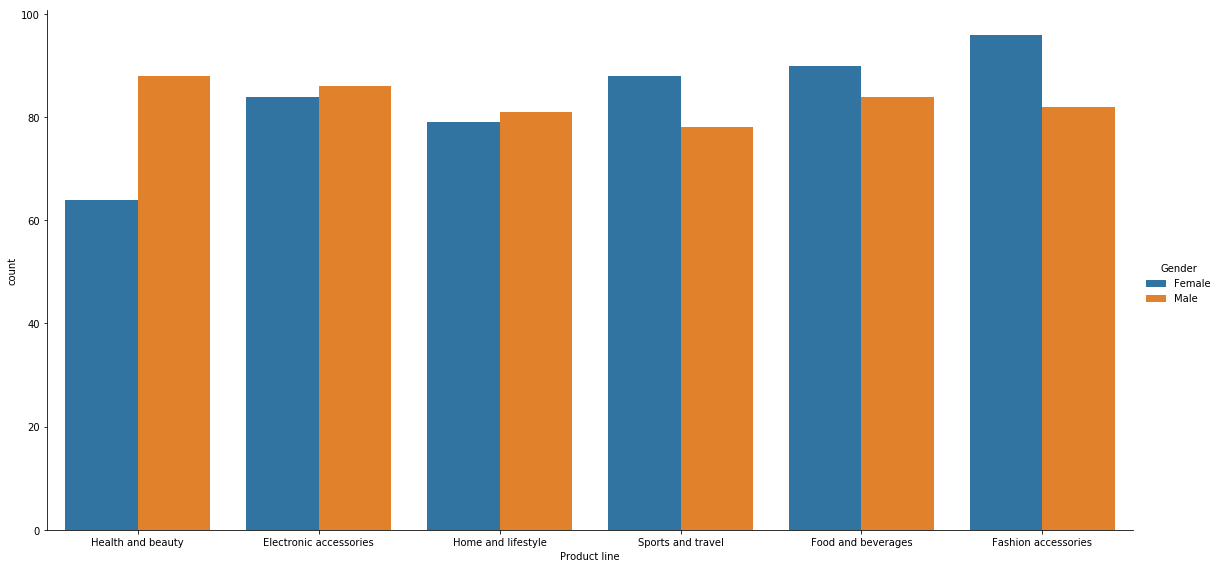

In [11]:
#checking the count of the gender for each product line
sns.catplot(x='Product line', hue='Gender',kind ='count', data=sales_data, aspect=2, height=8)

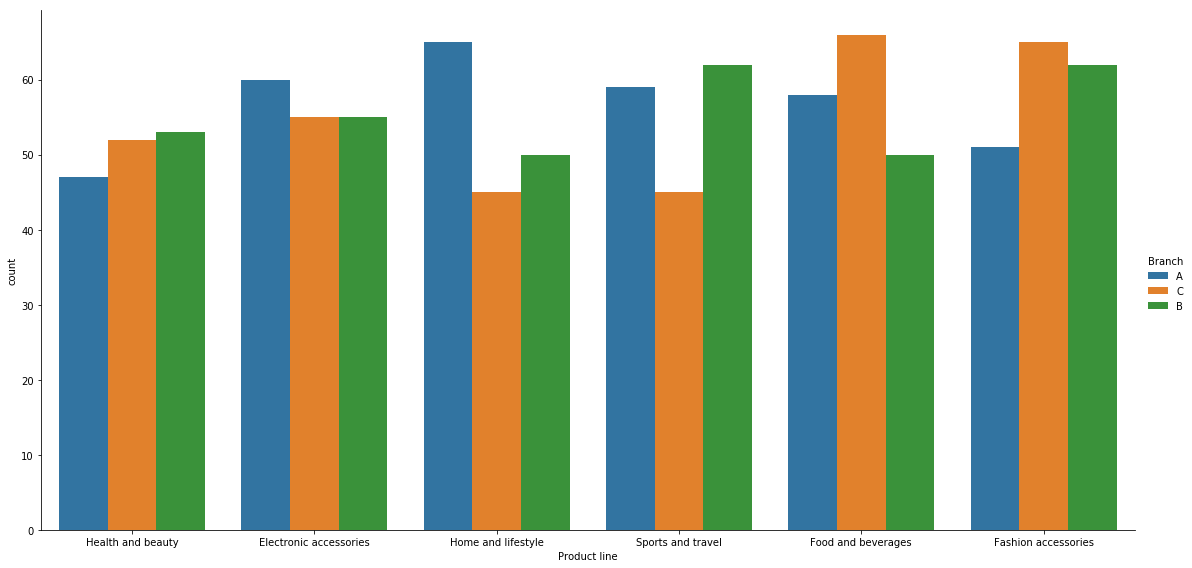

In [12]:
#count of branch for each product line
sns.catplot(x='Product line', hue='Branch',kind ='count', data=sales_data, aspect=2, height=8)

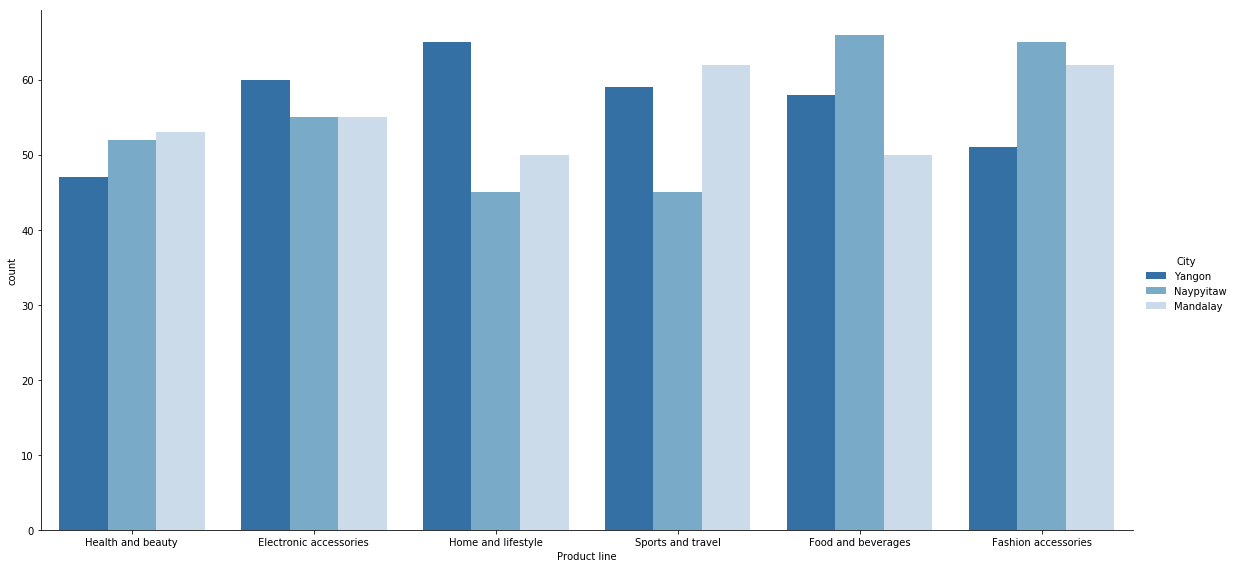

In [13]:
#count of city for each product line
sns.catplot(x='Product line', hue='City',kind ='count', data=sales_data, aspect=2, height=8,palette="Blues_r")

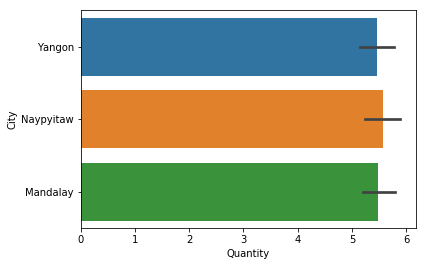

In [14]:
#barplot showing quantity in each city
sns.barplot(x="Quantity",y="City",data=sales_data)

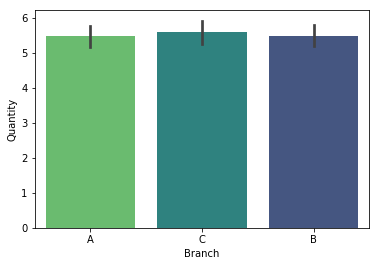

In [15]:
#barplot showing quantity in each Branch
sns.barplot(x="Branch",y="Quantity",data=sales_data,palette="viridis_r")

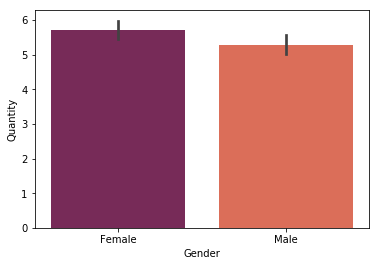

In [16]:
#barplot showing quantity relating to Gender
sns.barplot(x="Gender",y="Quantity",data=sales_data,palette="rocket")

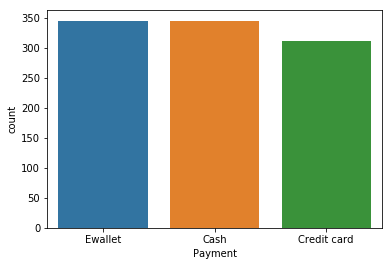

In [17]:
# which payment channel is used most
sns.countplot(x="Payment", data=sales_data)

   ### The most used payment channel is Ewallet, followed by Cash payment

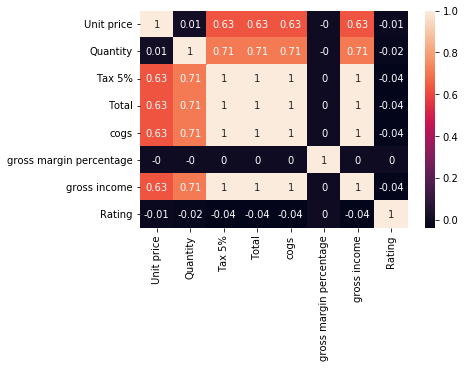

In [18]:
#check for correlation in the dataset
sns.heatmap(np.round(sales_data.corr(),2),annot = True)

### From the heatmap there is a positive correlation between "Unit price" and "cogs" at 63%, there is also a high correlation between "Quantity" and "gross income" at 71%

In [19]:
sales_data['Date'].nunique()

89

In [20]:
sales_data['Date'].value_counts()

2022-02-07    20
2022-02-15    19
2022-03-14    18
2022-03-02    18
2022-01-08    18
2022-01-25    17
2022-01-26    17
2022-01-23    17
2022-03-05    17
2022-03-09    16
2022-01-19    16
2022-02-25    16
2022-03-19    16
2022-03-20    15
2022-02-03    14
2022-02-02    14
2022-01-27    14
2022-01-28    14
2022-02-27    14
2022-03-03    14
2022-01-31    14
2022-01-14    13
2022-01-15    13
2022-02-09    13
2022-03-26    13
2022-01-24    13
2022-02-06    13
2022-02-17    13
2022-03-04    12
2022-01-01    12
              ..
2022-03-07     9
2022-01-10     9
2022-01-06     9
2022-03-25     9
2022-01-30     9
2022-03-16     9
2022-02-19     9
2022-01-07     9
2022-02-26     9
2022-01-09     8
2022-02-14     8
2022-02-12     8
2022-03-29     8
2022-01-11     8
2022-02-23     8
2022-02-13     8
2022-02-11     8
2022-01-21     8
2022-01-03     8
2022-02-16     8
2022-01-02     8
2022-02-18     7
2022-01-22     7
2022-03-18     7
2022-01-04     6
2022-03-21     6
2022-02-01     6
2022-03-17    

In [21]:
from datetime import date

In [22]:
len(sales_data[sales_data['Date'] == pd.Timestamp('2022-01-01 00:00:00')])

12

In [23]:
sales_data.Date[0]

Timestamp('2022-01-05 00:00:00')

In [24]:
total_sales= []
for i in sales_data.Date.unique():
    n= len(sales_data[sales_data['Date'] == i])
    total_sales.append(n)
np.array(total_sales)

array([12, 11, 14, 14, 12,  9, 16,  9,  9, 10, 13, 16,  8, 20,  8, 13, 11,
       12,  8, 17, 12, 13, 18, 10, 12, 17, 14,  9, 11, 11, 14, 12,  9, 14,
       11, 16, 14,  9,  6, 10, 10, 12, 19, 11,  8, 10, 13,  9,  8,  7, 10,
        8, 11, 17, 17,  8,  8, 13, 13, 10,  6, 10, 11, 12, 16, 10, 18,  7,
        9,  8, 11, 12,  6, 11,  9,  8,  6,  8, 13,  7, 15,  6, 14,  8,  9,
        6, 18, 11,  9])

In [25]:
len(sales_data[(sales_data['Date'] == pd.Timestamp('2022-01-01 00:00:00'))&(sales_data.Branch == 'A')])

5

In [26]:
#probability for A
prob_A = []
for i in sales_data.Date.unique():
    x = len(sales_data[(sales_data['Date'] == i)&(sales_data.Branch == 'A')])/len(sales_data[sales_data['Date'] == i])
    prob_A.append(x)
np.array(prob_A)

array([0.41666667, 0.36363636, 0.35714286, 0.42857143, 0.25      ,
       0.44444444, 0.375     , 0.22222222, 0.33333333, 0.3       ,
       0.15384615, 0.375     , 0.375     , 0.25      , 0.25      ,
       0.38461538, 0.45454545, 0.41666667, 0.625     , 0.11764706,
       0.25      , 0.53846154, 0.16666667, 0.7       , 0.5       ,
       0.29411765, 0.14285714, 0.33333333, 0.54545455, 0.36363636,
       0.28571429, 0.75      , 0.33333333, 0.35714286, 0.36363636,
       0.375     , 0.35714286, 0.33333333, 0.33333333, 0.5       ,
       0.4       , 0.16666667, 0.26315789, 0.36363636, 0.375     ,
       0.3       , 0.38461538, 0.55555556, 0.25      , 0.28571429,
       0.4       , 0.125     , 0.27272727, 0.17647059, 0.41176471,
       0.125     , 0.25      , 0.23076923, 0.46153846, 0.3       ,
       0.5       , 0.6       , 0.18181818, 0.41666667, 0.5       ,
       0.2       , 0.22222222, 0.42857143, 0.44444444, 0.125     ,
       0.27272727, 0.41666667, 0.33333333, 0.36363636, 0.11111

#### element-wise binomial simulation for elements in n {𝑁, 𝑃(𝐴)}:{𝐵(𝑛, 𝑝) for (𝑛, 𝑝) ∈ {𝑁 × 𝑃(𝐴)}}


In [27]:
import numpy.random as rnd

binomial_A = []
for n,p in zip(total_sales,prob_A):
    binomial_A.append(rnd.binomial(n,p))
    
np.array(binomial_A)

array([ 4,  2,  4,  5,  5,  6,  9,  1,  0,  3,  2,  8,  1,  2,  1,  5,  5,
        5,  5,  4,  1,  6,  2,  8,  4,  3,  2,  3,  8,  4,  4,  9,  4,  3,
        2,  5,  4,  2,  0,  4,  6,  1,  3,  3,  1,  5,  3,  5,  2,  3,  5,
        1,  0,  2,  7,  2,  2,  1,  5,  2,  4,  6,  2,  2, 11,  3,  3,  2,
        6,  1,  2,  8,  3,  4,  2,  3,  3,  1,  2,  2,  4,  2,  2,  5,  3,
        1,  3,  7,  5])

In [28]:
# to stabilise the result
binom_A = [(rnd.binomial(n,p,1000).mean()).astype(int) for n,p in zip(total_sales,prob_A)]
np.array(binom_A)


array([5, 3, 4, 6, 2, 4, 5, 2, 2, 3, 1, 5, 2, 4, 1, 4, 4, 4, 5, 2, 2, 7,
       3, 7, 5, 4, 1, 3, 6, 3, 3, 9, 2, 5, 4, 5, 4, 3, 2, 5, 3, 2, 4, 3,
       2, 2, 5, 4, 2, 2, 3, 0, 2, 2, 7, 1, 2, 3, 6, 2, 2, 6, 2, 4, 7, 2,
       4, 2, 3, 0, 3, 4, 1, 4, 0, 3, 3, 2, 1, 2, 5, 1, 3, 6, 1, 1, 4, 5,
       4])

In [29]:
binom_A = [(sum(rnd.binomial(n,p,1000))/1000).astype(int) for n,p in zip(total_sales,prob_A)]
np.array(binom_A)

array([4, 4, 4, 5, 2, 4, 6, 2, 2, 3, 1, 6, 3, 5, 2, 4, 4, 5, 5, 1, 3, 7,
       2, 6, 6, 5, 2, 3, 5, 3, 3, 8, 3, 4, 3, 5, 4, 2, 1, 4, 3, 2, 4, 3,
       3, 2, 5, 5, 1, 1, 4, 1, 2, 3, 7, 1, 2, 3, 6, 3, 2, 6, 1, 5, 8, 1,
       3, 3, 4, 1, 3, 4, 2, 3, 1, 3, 3, 1, 2, 2, 6, 1, 3, 6, 1, 1, 4, 4,
       4])

In [30]:
#probability for B

prob_B = []
for i in sales_data.Date.unique():
    x = len(sales_data[(sales_data['Date'] == i)&(sales_data.Branch == 'B')])/len(sales_data[sales_data['Date'] == i])
    prob_B.append(x)
np.array(prob_B)

array([0.25      , 0.09090909, 0.21428571, 0.14285714, 0.5       ,
       0.22222222, 0.5       , 0.33333333, 0.33333333, 0.6       ,
       0.38461538, 0.375     , 0.375     , 0.3       , 0.5       ,
       0.38461538, 0.27272727, 0.25      , 0.125     , 0.58823529,
       0.66666667, 0.15384615, 0.5       , 0.3       , 0.25      ,
       0.41176471, 0.42857143, 0.33333333, 0.09090909, 0.36363636,
       0.28571429, 0.08333333, 0.33333333, 0.42857143, 0.36363636,
       0.1875    , 0.35714286, 0.22222222, 0.33333333, 0.4       ,
       0.2       , 0.41666667, 0.36842105, 0.54545455, 0.25      ,
       0.3       , 0.46153846, 0.22222222, 0.375     , 0.28571429,
       0.3       , 0.25      , 0.54545455, 0.58823529, 0.        ,
       0.5       , 0.5       , 0.30769231, 0.23076923, 0.5       ,
       0.        , 0.1       , 0.36363636, 0.25      , 0.1875    ,
       0.3       , 0.33333333, 0.14285714, 0.22222222, 0.5       ,
       0.45454545, 0.25      , 0.5       , 0.27272727, 0.22222

In [31]:
#simulation for Branch B

binomial_B = []
for n,p in zip(total_sales,prob_B):
    binomial_B.append(rnd.binomial(n,p))
    
np.array(binomial_B)

array([ 0,  0,  7,  0,  5,  1, 10,  4,  5,  5,  4,  4,  1,  7,  5,  7,  3,
        2,  1, 10,  6,  0, 10,  3,  2,  5,  5,  4,  2,  3,  1,  0,  3,  7,
        6,  3,  2,  0,  2,  7,  3,  4,  7,  5,  0,  3,  5,  0,  4,  1,  5,
        2,  6, 11,  0,  4,  5,  5,  3,  6,  0,  0,  3,  0,  2,  4,  6,  1,
        1,  5,  4,  4,  1,  4,  2,  2,  2,  3,  3,  0,  6,  2,  6,  0,  5,
        2,  1,  7,  0])

In [32]:
# simulation for branch B with expectation

binom_B = [(rnd.binomial(n,p,1000).mean()).astype(int) for n,p in zip(total_sales,prob_B)]
np.array(binom_B)

array([ 3,  0,  2,  2,  5,  2,  8,  3,  3,  6,  5,  6,  3,  6,  4,  4,  2,
        3,  0, 10,  7,  2,  8,  3,  2,  7,  6,  2,  0,  3,  3,  0,  2,  6,
        4,  3,  4,  1,  2,  4,  1,  5,  7,  5,  1,  3,  5,  1,  3,  2,  2,
        2,  5,  9,  0,  3,  4,  3,  2,  5,  0,  0,  3,  2,  2,  3,  5,  1,
        2,  3,  5,  2,  2,  2,  2,  2,  0,  2,  4,  2,  5,  1,  7,  0,  6,
        1,  4,  4,  1])

In [33]:
# probability for branch C

prob_C = []
for i in sales_data.Date.unique():
    x = len(sales_data[(sales_data['Date'] == i)&(sales_data.Branch == 'C')])/len(sales_data[sales_data['Date'] == i])
    prob_C.append(x)
np.array(prob_C)

array([0.33333333, 0.54545455, 0.42857143, 0.42857143, 0.25      ,
       0.33333333, 0.125     , 0.44444444, 0.33333333, 0.1       ,
       0.46153846, 0.25      , 0.25      , 0.45      , 0.25      ,
       0.23076923, 0.27272727, 0.33333333, 0.25      , 0.29411765,
       0.08333333, 0.30769231, 0.33333333, 0.        , 0.25      ,
       0.29411765, 0.42857143, 0.33333333, 0.36363636, 0.27272727,
       0.42857143, 0.16666667, 0.33333333, 0.21428571, 0.27272727,
       0.4375    , 0.28571429, 0.44444444, 0.33333333, 0.1       ,
       0.4       , 0.41666667, 0.36842105, 0.09090909, 0.375     ,
       0.4       , 0.15384615, 0.22222222, 0.375     , 0.42857143,
       0.3       , 0.625     , 0.18181818, 0.23529412, 0.58823529,
       0.375     , 0.25      , 0.46153846, 0.30769231, 0.2       ,
       0.5       , 0.3       , 0.45454545, 0.33333333, 0.3125    ,
       0.5       , 0.44444444, 0.42857143, 0.33333333, 0.375     ,
       0.27272727, 0.33333333, 0.16666667, 0.36363636, 0.66666

In [34]:
#simulation for Branch C

binomial_C = []
for n,p in zip(total_sales,prob_C):
    binomial_C.append(rnd.binomial(n,p))
    
np.array(binomial_C)

array([ 3,  7,  8,  5,  4,  1,  1,  6,  5,  1,  3,  3,  2, 11,  1,  2,  2,
        7,  0,  6,  0,  6,  4,  0,  3,  8,  4,  2,  5,  2,  6,  3,  3,  3,
        3,  8,  5,  4,  2,  0,  5,  5,  5,  0,  2,  5,  3,  2,  5,  4,  3,
        7,  3,  6,  6,  3,  2,  9,  3,  2,  1,  2,  5,  5,  5,  7,  3,  2,
        5,  2,  2,  6,  1,  4,  5,  1,  0,  4,  5,  3,  2,  1,  3,  1,  0,
        1, 10,  3,  9])

In [35]:
# simulation for branch C with expectation

binom_C = [(rnd.binomial(n,p,1000).mean()).astype(int) for n,p in zip(total_sales,prob_C)]
np.array(binom_C)

array([ 3,  5,  5,  6,  3,  2,  2,  4,  2,  1,  5,  4,  2,  8,  2,  2,  3,
        3,  1,  5,  0,  4,  5,  0,  2,  4,  6,  3,  4,  3,  5,  2,  2,  3,
        3,  6,  4,  3,  1,  0,  3,  5,  7,  1,  3,  3,  1,  2,  3,  2,  3,
        4,  2,  4, 10,  3,  2,  5,  4,  1,  2,  3,  5,  4,  4,  4,  8,  2,
        3,  3,  2,  3,  0,  3,  5,  2,  0,  3,  6,  3,  3,  2,  4,  1,  0,
        1,  8,  1,  4])

### Algorithm 1.2

In [36]:
#Total number of times sales was made in the entire history
n_e = len(sales_data['Date'])
n_e

1000

In [37]:
# total number of times sales were recorded in branch A
n_a = len(sales_data[(sales_data['Branch'] == "A")])
n_a

340

In [38]:
#probability of success in branch A
p_A = n_a/n_e
p_A

0.34

In [39]:
# possible daily outcomes for branch A in Q2
binom2_A = [(sum(rnd.binomial(1000,0.34,340)/340).astype(int) + rnd.binomial(n,p)-n_a) for n,p in zip(total_sales,prob_A)]
np.array(binom2_A)

array([ 3,  3,  9,  8,  5,  4,  6,  4,  2,  0,  0,  7,  4,  6,  1,  7,  7,
        0,  3,  0,  0,  6,  2,  7,  8,  5,  4,  2,  4,  4,  5,  7,  4,  7,
        3,  6,  5,  1,  1,  4,  5,  1,  2,  8,  3,  3,  3,  5,  4,  2,  2,
        1,  4,  2,  8,  0,  0,  2,  3,  4,  1,  8,  2,  5, 10,  3,  6,  2,
        0, -2,  1,  3, -1,  6,  1,  3,  5,  0,  0,  1,  8, -1,  3,  2,  1,
        2,  5,  2,  5])

In [40]:
#total number of times sales were recorded in branch B
n_b = len(sales_data[(sales_data.Branch == "B")])
n_b

332

In [41]:
#probability of success in branch B
p_B = n_b/n_e
p_B

0.332

In [42]:
#possible daily outcomes for branch B in Q2
binom2_B = [(sum(rnd.binomial(1000,0.332,332)/332).astype(int) + rnd.binomial(n,p)-n_b) for n,p in zip(total_sales,prob_B)]
np.array(binom2_B)

array([ 1,  2,  1,  0,  5,  0,  9,  1,  1,  3,  2,  5,  0,  4,  2,  7,  1,
        3,  1,  9,  6,  1, 12,  1,  2,  4,  6,  0,  3,  3,  3,  1,  5,  6,
        0,  2,  8,  2,  0,  6,  3,  6,  7,  7, -1,  1,  6,  1,  4,  2,  1,
        4,  4, 12, -1,  1,  4,  5,  2,  4,  0, -1,  1,  3,  2,  3,  2,  3,
        0,  7,  5,  4,  2,  2,  0,  2,  2,  5,  3,  2,  5,  2,  5, -1,  6,
        2,  3,  5,  2])

In [43]:
#total number of times sales were recorded in branch C
n_c = len(sales_data[(sales_data.Branch == "C")])
n_c

328

In [44]:
#probability of success in branch C
p_C = n_c/n_e
p_C

0.328

In [45]:
#possible daily outcomes for branch C in Q2
binom2_C = [(sum(rnd.binomial(1000,0.328,328)/328).astype(int) + rnd.binomial(n,p)-n_c) for n,p in zip(total_sales,prob_C)]
np.array(binom2_C)

array([ 6,  4,  7,  6,  2,  2,  3,  3,  4,  0,  7,  3,  2, 10,  1,  2,  6,
        1,  1,  2,  1,  3,  4,  0,  2,  4, 11,  2,  6,  2,  7,  1,  2,  2,
        4, 11,  2,  3,  1, -1,  4,  7,  5,  0,  0,  3,  3,  2,  3,  3,  3,
        4,  0,  2, 10,  4,  2,  4,  4, -1,  1,  5,  5,  6,  2,  2,  7,  2,
        3,  2,  2,  8, -1,  3,  7,  1,  1, -1,  3,  4,  0,  3,  5, -1, -1,
        2,  8,  1,  2])

In [46]:
#use timedelta to get the dates for Q2
from datetime import timedelta
sales_data['Date'] = sales_data['Date'] + timedelta(days=90)

#aggregate for three Branches
aggregate = pd.DataFrame({'Date':sales_data['Date'].value_counts().sort_index(ascending = True).index,
                         'Branch A':binom2_A,
                         'Branch B':binom2_B,
                         'Branch C':binom2_C})
aggregate

,Date,Branch A,Branch B,Branch C
0,2022-04-01,3,1,6
1,2022-04-02,3,2,4
2,2022-04-03,9,1,7
3,2022-04-04,8,0,6
4,2022-04-05,5,5,2
5,2022-04-06,4,0,2
6,2022-04-07,6,9,3
7,2022-04-08,4,1,3
8,2022-04-09,2,1,4
9,2022-04-10,0,3,0


### Objective 1B